# Datasets and Meta-analysis
The following notebook contains details about the datasets utilised in the study; the datasets consist of ground-truth collected for the study and a collection from public repositories. The meta-analysis aspect deals with relevant exploratoy analyses for a better understanding of the data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
import json, time, re, os
from mlxtend.plotting import ecdf

## Dataset
### 1.1 MCT Datasets

    This is the data collected for the study consisting of collections of ground-truth (dyadic and transitive datasets) and predicted ties. 
    
**Dyadic data** consist of a collection of nodes with binary reciprocal ties. Details about how to obtain the data is available at https://github.com/ijdutse/dyads_in_Twitter

In [4]:
pwd

'/home/ijdutse/gitfiles/mct'

In [7]:
# collection of dyads:
dyads = pd.read_csv('data/unique_dyads_and_network_size_of_verified_and_unverifed.csv')
len(dyads); dyads.head(3)

,NetworkSize,Dyads,Category
0,489,158,Unverified
0,370,142,Unverified
0,333,163,Unverified


In [11]:
#dyads according to verified and unverifed user categories:
s2udyads = pd.read_csv('data/second_generation_dyads_unverified_anchors_and_buddies.csv')
s2vdyads = pd.read_csv('data/second_generation_dyads_verified_anchors_and_buddies.csv')
len(s2udyads), len(s2vdyads)

(7121, 8257)

In [13]:
s2udyads.head(4)

,G2_Anchor,ChildID,ChildScreenName,Lineage,ChildFriends,ChildFollowers,PairwiseSize,Tracker
0,ArmaniStation,3265484348,mxslimxh,ArmaniStation:mxslimxh,67,3852,158,"(158, 331)"
1,ArmaniStation,228168148,d1vyaaa,ArmaniStation:d1vyaaa,690,4485,158,"(158, 331)"
2,ArmaniStation,241925227,TWlSTEDFANTASY,ArmaniStation:TWlSTEDFANTASY,371,4524,158,"(158, 331)"
0,shpirtinezi,905423614824067073,hhavink62,shpirtinezi:hhavink62,34,13,142,"(142, 228)"


In [14]:
s2vdyads.head()

,G2_Anchor,ChildID,ChildScreenName,Lineage,ChildFriends,ChildFollowers,PairwiseSize,Tracker
0,vmochama,423789970,imaaniwaalker,vmochama:imaaniwaalker,294,268,35,"(35, 1549)"
1,vmochama,16711211,alexgpaterson,vmochama:alexgpaterson,996,920,35,"(35, 1549)"
2,vmochama,839456750000558080,ShelleyBFarmer,vmochama:ShelleyBFarmer,1138,1402,35,"(35, 1549)"
3,vmochama,21677048,amydempsey,vmochama:amydempsey,1262,3751,35,"(35, 1549)"
0,GCLongform,45952641,adamellsegal,GCLongform:adamellsegal,462,415,113,"(113, 463)"


In [16]:
# used or training dyads prediction model ... 
d_train = pd.read_csv('data/unverified_dyads.csv')
d_train.head(3)

,Dyad,B1_ID,B1_ScreenName,B1_CreatedAt,B1_Followers,B1_Friends,B1_Statuses,B1_Description,B1_Location,B1_Favourite,...,B2_Followers,B2_Friends,B2_Statuses,B2_Description,B2_Location,B2_Favourite,B2_Verification,B2_Tweet,B2_AccountCreated,B2_RTCount
0,"('ArmaniStation', 'mxslimxh')",966710486,ArmaniStation,2012-11-23 19:38:18,4153,484,14942,No bio,The Netherlands/London,5338,...,4039,80,292,أهل السنة والجماعة,NaN,12876,False,@YaqubAlRashid1 Yea I also read that Hadith! T...,2019-03-06 20:54:02,0.0
1,"('ArmaniStation', 'diyaldn')",966710486,ArmaniStation,2012-11-23 19:38:18,4153,484,14942,No bio,The Netherlands/London,5338,...,4446,681,51349,revert 🌱🕋,"South london, UK",9784,False,NaN,NaN,NaN
2,"('ArmaniStation', 'TWlSTEDFANTASY')",966710486,ArmaniStation,2012-11-23 19:38:18,4153,484,14942,No bio,The Netherlands/London,5338,...,4512,368,249160,🇮🇷🇮🇹🇫🇷,LDN/PRS/MLN,141504,False,@DrunkyGa i love you too mon roi 💓,2019-03-06 21:56:12,0.0


**Simelian/transitive data** consist of a collection of nodes with transitive reciprocal ties. The *transitive nodes* consist of bidirectionally connected nodes which are used as anchors to retreive additional set of users with reciprocal ties, hence culminating to transitive relations.

In [22]:
# collection of nodes with transitive reciprocal ties...
simm_df = pd.read_csv('data/nodes_with_simmelian_ties.csv')
len(simm_df); simm_df.head(3)

,G2_Anchor,Lineage,BuddyID,BuddyScreenName,BuddyFriends,BuddyFollowers
0,vmochama,genna_buck:vmochama:alexgpaterson,16711211,alexgpaterson,993,920
1,vmochama,genna_buck:vmochama:ShelleyBFarmer,839456750000558080,ShelleyBFarmer,1118,1364
2,vmochama,genna_buck:vmochama:amydempsey,21677048,amydempsey,1263,3749


**Some examples:** In the following three dataframes, collection of related pairs results in transitive ties. Depending on which node is used in identifying reciprocal ties, the nodes are given in the form of generations spanning the following triplets: $parent:child:grandchild$ ... In the forthcoming examples (and the previous ones), the values in the dataframes are connected to the first generation anchors (G1_Anchor), to second generation anchor (G2_Anchor) via the parent nodes.     
    # ... collection of dyads from transitive set 

In [24]:
#Reciprocal ties in transitive collections from verirfied & unverified user categories:
du3_dyads = pd.read_csv('data/reciprocal_ties_in_unverified_anchors.csv')
dv3_dyads = pd.read_csv('data/reciprocal_ties_in_verified_anchors.csv')
len(du3_dyads), len(dv3_dyads); du3_dyads.head(3)

,ScreenName,FollowersCount,FriendsCount,Lineage,Status,Class,NetworkSize,Indegree,Outdegree
369,GMan82721611,273,585,jackcade1381:GMan82721611,Child,1,858,0.318182,0.681818
152,jjpaldad,92,130,NaN,Parent,1,222,0.414414,0.585586
546,bordersnbetween,502,1270,FredSeguinPhoto:bordersnbetween,Child,1,1772,0.283296,0.716704


In [25]:
dv3_dyads.head(3)

,G3_Anchor,ChildID,ChildScreenName,Lineage,ChildFriends,ChildFollowers,PairwiseSize,Tracker
0,amydempsey,119818938,ZosiaBielski,amydempsey:ZosiaBielski,911,2588,1,"(1, 999)"
0,DACrosbie,197458714,DanDelmar,DACrosbie:DanDelmar,860,4666,1,"(1, 999)"
0,NickVanPraet,119818938,ZosiaBielski,NickVanPraet:ZosiaBielski,911,2588,3,"(3, 997)"


In [27]:
#set of directed nodes for training:
simm_train = pd.read_csv('data/nodes_with_directed_ties.csv')
len(simm_train); simm_train.head(3)

,Dyad,B1_ID,B1_ScreenName,B1_CreatedAt,B1_Followers,B1_Friends,B1_Statuses,B1_Description,B1_Location,B1_Favourite,...,B2_Statuses,B2_Description,B2_Location,B2_Favourite,B2_Verification,B2_Tweet,B2_AccountCreated,B2_RTCount,Status,Class
0,"('S4JJ40', 'Ghufran23924906')",744012835311730689,S4JJ40,2016-06-18 03:44:17,983,433,1631,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏\nرَبَّنَا آتِنَا فِي الدُّنْ...,Kunar ~ Pekhawar,2938,...,4,NaN,NaN,3,False,RT @INReunification: Holi at Quaid-i-Azam Univ...,2019-03-25 19:49:51,84.0,Directed,0
1,"('S4JJ40', 'NajmRT')",744012835311730689,S4JJ40,2016-06-18 03:44:17,983,433,1631,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏\nرَبَّنَا آتِنَا فِي الدُّنْ...,Kunar ~ Pekhawar,2938,...,2733,#Peace #Respect #love . Engineer #UETi...,NaN,1909,False,Some Lucky Cats in Baitullah Makkah 😻 https://...,2019-04-15 15:39:22,0.0,Directed,0
2,"('S4JJ40', 'Fatabbayanoo')",744012835311730689,S4JJ40,2016-06-18 03:44:17,983,433,1631,‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏‏\nرَبَّنَا آتِنَا فِي الدُّنْ...,Kunar ~ Pekhawar,2938,...,53,Afghan / Durrani / Parsi Pataan 🏳🏴Youtube Has ...,Graveyard Of SuperPowers,1,False,Fatabayanoo Productions Afghan Nasheed...,2019-04-16 09:46:23,0.0,Directed,0


**For more details about the use of Simmelian ties, see:**
* Inuwa-Dutse I., Liptrott M., Korkontzelos Y. (2019) Simmelian ties on Twitter: empirical analysis and prediction. *The Sixth IEEE International Conference on Social Networks Analysis, Management and Security,* SNAMS-2019, Granada

In [2]:
### Textual data extraction: see the sister notebook -- MCT-textual_component.ipynb

### 1.2 SNAP Datasets
**Extraction:** the SNAP data is available at http://snap.stanford.edu/data/ego-Facebook.html; we extract relevant fields and transform the data to suit the study need. The naming convention in the original data repository is maintained ...

    # Edges from all ego-networks

In [28]:
# edges from all ego-networks combined:
fd = pd.read_csv('data/snapdata/facebook_combined.txt', sep=' ',names=['UserID','Edge'])
# include the network or circle size of each ego:
fd['Dyads'] = [(fd.iloc[i][0],fd.iloc[i][1]) for i in range(len(fd))] # keeps track of dyadic ties
fd['CircleSize'] = fd.UserID.apply(lambda x: len(fd[fd.UserID==x])) # size of ego circles
# save the new files:  
fd.to_csv('data/snapdata/fb_ego_and_circle_size.csv', index_label=False)
# unduplicated ego-net:
ufd = fd.drop_duplicates(subset='UserID')
#size of attributes:
len(fd), len(set(fd.UserID)), len(set(fd.Dyads))

(88234, 3663, 88234)

In [80]:
# samples from file with duplicate:
fd.head(3)

,UserID,Edge,Dyads,CircleSize
0,0,1,"(0, 1)",347
1,0,2,"(0, 2)",347
2,0,3,"(0, 3)",347


In [81]:
# samples from file without duplicates:
ufd.head(3)

,UserID,Edge,Dyads,CircleSize
0,0,1,"(0, 1)",347
347,1,48,"(1, 48)",16
363,2,20,"(2, 20)",9


**Nodes, circles and profile attributes**
- Because each ego/node share certain attributes/properties -- circle, circle size, profile features, we group those attributes in a single file as follows. We start by aggregating the attributies of a single node/ego, then scale the process accordingly. There are 10 ego-networks and Each ego-network consists of shared circles, edges and corresponding features of edges/nodes. We extract this information and merge it in  single file for ease of interpretation. This is to make it suitable for our use case and simplify the process because the data in its original form is difficult to work with and understand, especially that the features unevenly distributed (making it difficult to generalise) and mapping/correspondence between features and edges is vague/not clear. We aim to make this as clearer as possible.

        # all nodes and all circles:

In [95]:
# read the files and store relevant files:
import os
files = os.listdir('/data/snapdata/facebook/')
fl = lambda l: [v for sl in l for v in sl]
for file in files:
    frame = defaultdict()
    if file.endswith('.circles'):        
        extracts = defaultdict()
        with open('/data/snapdata/facebook/'+file, 'rt') as f:
            for line in f.readlines():
                extracts[line.split()[0]]=line.split()[1:]
        # dataframe of users and cricles:
        users_circles = dict()
        users = []
        circles = []
        for key in extracts.keys():
            for value in extracts[key]:
                users_circles[key] = value
                circles.append(key)
                users.append(value)
        duc = pd.DataFrame({'UserID':users,'Circles':circles})
        # save files/the extracts for further analysis:
        duc.to_csv('/data/snapdata/facebook/extracts/users_circles'+file+'.csv',index_label=False)

In [96]:
# some samples:
duc = pd.read_csv('/data/snapdata/facebook/extracts/users_circles0.circles.csv')
duc.head(3)

,UserID,Circles
0,71,circle0
1,215,circle0
2,54,circle0


In [621]:
# read the files and store relevant files:
files = os.listdir('/data/snapdata/facebook/')
fl = lambda l: [v for sl in l for v in sl] # a flat list:
for file in files:
    frame = defaultdict()
    if file.endswith('.circles'):
        with open('/data/snapdata/facebook/'+file, 'rt') as f:
            for line in f.readlines():
                frame[line.split()[0]] =[int(i) for i in line.split()[1:]]   
            # use flat list to assin index:
            index = fl(frame.values())
            columns = [c for c in frame.keys()]
            # create an empty dataframe with edges as index and circles as columns:
            dk = pd.DataFrame(index=index, columns=columns, dtype=np.int)
            # create a mapping function between the frame and df...assign 1/0 according to the truthness of the mapping
            for k, v in zip(frame.keys(), frame.values()):
                for i in v:
                    if dk.loc[i,k].any():
                        dk.loc[i,k]=1
                    else:
                        dk.loc[i,k]=0
            # replace NANs ... :
            dk = dk.replace(np.nan, 0)
            # save files/the extracts for further analysis:
            dk.to_csv('/data/snapdata/facebook/extracts/'+file+'.csv', index_label=False)        

    # some examples of the extracts ... 

In [630]:
# see some sample saved files:
dc = pd.read_csv('/data/snapdata/facebook/extracts/0.circles.csv')
dc.head(3)

,circle0,circle1,circle2,circle3,circle4,circle5,circle6,circle7,circle8,circle9,...,circle14,circle15,circle16,circle17,circle18,circle19,circle20,circle21,circle22,circle23
71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Establish mapping with the remaining attributes:* There is a need to aggragate all the 10 nodes and the corresponding circles, features and other relevant features for further analysis. The circles are the communities and the nodes/indices are the ids of the nodes ...  
**Nodes and features::**

In [689]:
files = os.listdir('/data/snapdata/facebook/')
for file in files:
    if file.endswith('.feat'):
        # load the data t ascertain the number of columns and use the information name the columns
        d = pd.read_csv('/data/snapdata/facebook/'+file, sep=' ')
        #reload and assign proper names:
        df = pd.read_csv('/data/snapdata/facebook/'+file, sep=' ',names=['F'+str(f) for f in range(len(d.columns)-1)])
        df.to_csv('/data/snapdata/facebook/extracts/'+file+'.csv')
        #reload and assign the userID:
        df = pd.read_csv('/data/snapdata/facebook/extracts/'+file+'.csv')
        df = df.rename(columns={'Unnamed: 0':'UserID'})
        df.to_csv('/data/snapdata/facebook/extracts/'+file+'.csv',index_label=False)

In [692]:
# see some sample saved files:
df = pd.read_csv('/data/snapdata/facebook/extracts/348.feat.csv')
df.head(3)

,UserID,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F151,F152,F153,F154,F155,F156,F157,F158,F159,F160
0,349,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,350,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,351,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Features**

    # because the features have a maximum dimension/number of columns of 4, each feature column is denoted by FC# where # refers to the column number, e.g. FC1.

In [2]:
# a function to trim the anonymised features for brevity:
def trim_feat(x):
    x=str(x)
    #if x!=np.nan:
    if x.startswith('anon'):
        return 'AF'+x.split()[2]
    # remove prefixed digits in features:elif x.isdigit(): re.findall('[a-zA-Z]+',r)
    else:
        return x

In [1274]:
files = os.listdir('/data/snapdata/facebook/')
for file in files:
    if file.endswith('.featnames'):
        df = pd.read_csv('/data/snapdata/facebook/'+file, sep=';',\
                        names=['FC'+str(f) for f in range(4)])
        # remove digits in features and apply the trim_features function on the feature columns:
        df['FC0']=df.FC0.apply(lambda x: re.findall('[a-zA-Z]+',x)[0])
        #trim features:
        df['FC1']=df.FC1.apply(trim_feat)
        df['FC2']=df.FC2.apply(trim_feat)
        df['FC3']=df.FC3.apply(trim_feat)
        #save file:
        df.to_csv('/data/snapdata/facebook/extracts/'+file+'.csv',index_label=False)
        #associate the UserID with the features:

In [137]:
# see some sample saved files:
df = pd.read_csv('/data/snapdata/facebook/extracts/348.featnames.csv')
df.head(3)

,FC0,FC1,FC2,FC3
0,birthday,AF206,NaN,NaN
1,birthday,AF207,NaN,NaN
2,birthday,AF208,NaN,NaN


    # associate each feature set with the corresponding UserIDs:

In [180]:
# feature list (fl) an feature names (fn)
fl = pd.read_csv('/data/snapdata/facebook/extracts/3980.feat.csv')
fn = pd.read_csv('/data/snapdata/facebook/extracts/3980.featnames.csv')
len(fl), len(fl.columns), len(fn)

(59, 43, 42)

In [181]:
fl.head(3)

,UserID,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41
0,3981,0,1,0,0,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,3982,0,0,0,0,0,1,1,1,0,...,1,1,0,0,0,0,0,1,0,0
2,3983,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    # the above file consists of the feature vector of each node. For instance, user 3981 consists of features ranging from F0 to F41 where F1, F4, F5, F6, F7 and F34 are turned on. Note that F5 to F7 are similar to user 3982. The goal is to assign names to those features, e.g. F0-->first_name, for interpretability. We use the below file consising of feature columns (FC#) to associate each feature with the corresponding names accordingly .. 

In [182]:
fn.head(3)

,FC0,FC1,FC2,FC3
0,birthday,AF6,NaN,NaN
1,education,concentration,id,AF14
2,education,degree,id,AF22


**Users and Feature names:** The number of columns is the same as the number of features in file.feat.csv and file.featnames.csv; hence the name of the features can be used as the columns names in file.feat.csv instead of F0, F1, etc. Aditional file is created to contain this information as descibed below. *what is not clear is whether the ordering of the features matters. Although the order is trivial at this stage, we assume that the order is the same in the manner the features are reported in the original file.*

In [183]:
# number of columns/features in fl is equal to the number of instances in fn (note that the userID column not included):
len(fn), len(fl.columns)-1 # minus the userID column 

(42, 42)

In [185]:
# define the indices and columns for the new dataframe:
k = list(set(fn.FC0).union(set(fn.FC1)).union(set(fn.FC2)).union(set(fn.FC3)))
k.remove(np.nan)
len(fl),len(fn),len(fl.columns),len(k)

(59, 42, 43, 59)

In [186]:
# create an empty dataset to store the relevant values (user-features dataframe:):
usf = pd.DataFrame(data = np.zeros(shape=(len(fl.UserID),len(k))),index=fl.UserID, columns=k, dtype=np.int16)
#or using this to assign values: for i in usf.index: for c in usf.columns: usf.loc[i,c]=0

In [187]:
usf.head(3)

,AF62,AF77,AF1276,AF22,AF6,AF1277,employer,AF57,AF253,AF1279,...,AF127,start_date,AF156,birthday,AF125,AF254,AF1282,AF1270,school,AF1274
UserID,,,,,,,,,,,,,,,,,,,,,
3981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
fl.head(3)

,UserID,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41
0,3981,0,1,0,0,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,3982,0,0,0,0,0,1,1,1,0,...,1,1,0,0,0,0,0,1,0,0
2,3983,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
fn.head(3)

,FC0,FC1,FC2,FC3
0,birthday,AF6,NaN,NaN
1,education,concentration,id,AF14
2,education,degree,id,AF22


In [190]:
len(usf), len(d1),len(d2), len(usf.columns),len(d1.columns)

(59, 59, 42, 59, 43)

In [191]:
# harmonise the discepancies in lenghts:
addr = pd.DataFrame(index=range(len(usf.index)-len(fn)), columns=['FC0', 'FC1','FC2','FC3'],dtype=np.int)
fn = fn.append(addr, ignore_index=True)

In [194]:
len(usf.index), len(fn)

(59, 59)

In [196]:
for idx, r in zip(usf.index, range(len(usf))):
    flist = [f for f in fn.loc[r]] # store a temporal list of features ... 
    for col in usf.columns: 
        if col in flist:
            usf.loc[idx, col] = 1
        else:
            usf.loc[idx,col] = 0

In [199]:
usf.head(3)

,AF62,AF77,AF1276,AF22,AF6,AF1277,employer,AF57,AF253,AF1279,...,AF127,start_date,AF156,birthday,AF125,AF254,AF1282,AF1270,school,AF1274
UserID,,,,,,,,,,,,,,,,,,,,,
3981,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3983,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
# a generalise approach to suit all files:
files = os.listdir('/data/snapdata/facebook/extracts')
for f1 in files:
    if f1.endswith('.feat.csv'):
        f2 = f1[:-4]+'names.csv' # define f2:
        fl = pd.read_csv('/data/snapdata/facebook/extracts/'+f1)
        fn = pd.read_csv('/data/snapdata/facebook/extracts/'+f2)
        
        # define the indices and columns for the new dataframe:
        k = list(set(fn.FC0).union(set(fn.FC1)).union(set(fn.FC2)).union(set(fn.FC3)))
        k.remove(np.nan)
        # create an empty dataset to store the relevant values (user-features dataframe:):
        usf = pd.DataFrame(data = np.zeros(shape=(len(fl.UserID),len(k))),index=fl.UserID, columns=k, dtype=np.int16)
        #or using this to assign values: for i in usf.index: for c in usf.columns: usf.loc[i,c]=0
        
        # harmonise the discepancies in lenghts:
        addr = pd.DataFrame(index=range(len(usf.index)-len(fn)), columns=['FC0', 'FC1','FC2','FC3'],dtype=np.int)
        fn = fn.append(addr, ignore_index=True)
        print(f1,f2)
        
        for idx, r in zip(usf.index, range(len(usf))):
            flist = [f for f in fn.loc[r]] # store a temporal list of features ... 
            for col in usf.columns: 
                if col in flist:
                    usf.loc[idx, col] = 1
                else:
                    usf.loc[idx,col] = 0
        #save file:
        usf.to_csv('/data/snapdata/facebook/extracts/'+'user_features.'+f1, index_label=False)
        #associate the UserID with the features:

698.feat.csv 698.featnames.csv
686.feat.csv 686.featnames.csv
3980.feat.csv 3980.featnames.csv
0.feat.csv 0.featnames.csv
348.feat.csv 348.featnames.csv
1684.feat.csv 1684.featnames.csv
414.feat.csv 414.featnames.csv
1912.feat.csv 1912.featnames.csv
3437.feat.csv 3437.featnames.csv
107.feat.csv 107.featnames.csv


In [97]:
# see some samples from saved files:
df = pd.read_csv('/data/snapdata/facebook/extracts/user_features.414.feat.csv')
df.head(3)

,AF327,AF77,employer,AF319,AF329,AF101,AF310,AF59,locale,AF222,...,gender,AF127,start_date,AF71,AF200,birthday,first,AF228,school,AF331
573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
###

## 2. Meta-analysis

To better understand the data, the focus is on high-level analysis to gain useful insights through:
- *Cummulative Distribution Function (CDF):* Due to the large amount of data, we use the CDF, which gives the probability of a quantity evaluated at arbitrary points. We plot numerous CDFs for the analyses. The cummulative percentage is plotted against the number/proportion of dyads (the quantity we are measuring) in verified and unverifiied users. This is useful in aswering/exploring some question.For instance, how the proportions of dyads or Simmelian ties vary across the *user categories* or *network size*.
- *Network size* and *proportion of reciprocal ties* in both verified and unverified accounts
- *SNAP data* relationship between *number of edges* and *circles*

### 2.1 MCT Data

In [34]:
#DYADS: ... merged with transitive ties for comprehensive visualisation ... 
df2 = pd.read_csv('data/mctdata/dyads/dyads_and_network_size_of_verified_and_unverifed.csv')
df2 = df2.drop_duplicates(subset='NetworkSize')
df2['NetDyadsRatio'] = df2.Dyads/df2.NetworkSize
#get verified and unverifed users in separate files for the CDF:#df = df[:100]
dv2 = df2[df2['Category']=='Verified']
du2 = df2[df2['Category']=='Unverified']
#len(df2), len(dv2), len(du2) # df2.head()

# sort the dydads:
xv2 = np.sort(dv2.NetworkSize) # OR dv.Dyads and du.Dyads
xu2 = np.sort(du2.NetworkSize)
# the y-axis is evenly spaced datapoints in the continuum of probability i.e. 0 to 1 as a function the dyads:
yv2 = np.sort(dv2.NetDyadsRatio) # OR #yv = np.arange(1, len(xv)+1)/len(xv) AND #yu = np.arange(1, len(xu)+1)/len(xu)
yu2 = np.sort(du2.NetDyadsRatio)

# DATA FOR META-ANALYSIS:
df3 = pd.read_csv('~/analysis/transitivity/data/all_verified_and_unverified_connections.csv')
#df1 = df1[df1.Reciprocity<1]
df3 = df3[['FollowersCount','FriendsCount','Type','NetworkSize','Dyads','Directed','Indegree',\
         'Outdegree','Reciprocity','Category']]
df3['NetDirected']=df3.Directed/df3.NetworkSize # inlude proportion of directed nodes
#len(df3); df3.head(3)

du3 = df3[df3.Category=='Unverified']
dv3 = df3[df3.Category=='Verified']
#len(df),len(du),len(dv)
# isolate the x-values for ECDF ... 
du_directed3 = du3[du3.Type=='Null']
dv_directed3 = dv3[dv3.Type=='Null']
du_dyads3 = du3[du3.Type=='Dyads']
dv_dyads3 = dv3[dv3.Type=='Dyads']
du_transitive3 = du3[du3.Type=='Transitive']
dv_transitive3 = dv3[dv3.Type=='Transitive']
#len(du_directed3),len(dv_directed3),len(du_dyads3),len(dv_dyads3),len(du_transitive3),len(dv_transitive3)


# ADITIONAL SET, ... used earlier for analysis and training
df4 = pd.read_csv('~/analysis/transitivity/data/verified_and_unverified_connections_inference_data.csv')
#len(df4) #df4.head()

du4 = df4[df4.Category=='Unverified']
dv4 = df4[df4.Category=='Verified']
#len(df4),len(du4),len(dv4)
# isolate the x-values for ECDF ... 
du_directed4 = du4[du4.Type=='Null']
dv_directed4 = dv4[dv4.Type=='Null']
du_dyads4 = du4[du4.Type=='Dyads']
dv_dyads4 = dv4[dv4.Type=='Dyads']
du_transitive4 = du4[du4.Type=='Transitive']
dv_transitive4 = dv4[dv4.Type=='Transitive']
#len(du_directed4),len(dv_directed4),len(du_dyads4),len(dv_dyads4),len(du_transitive4),len(dv_transitive4)


    # visualisation I:

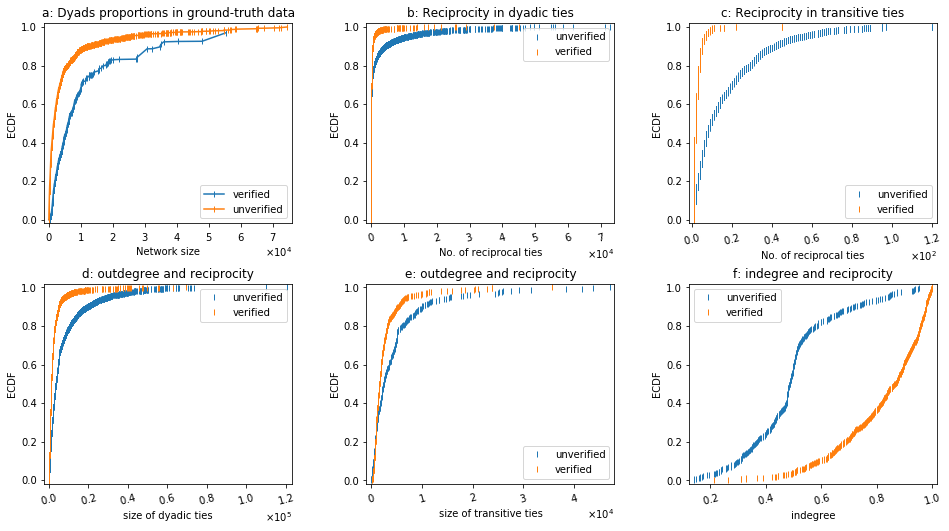

In [35]:
# RECIPROCITY IN A COLLECTION OF NODES WITH A HIGH PROPORTION OF RECIPROCAL TIES BASED ON GROUND-TRUTH DATA
plt.figure(figsize=(16,4))
plt.subplot(231)
 
plt.plot(xv2,yv2, marker = '|', label='verified') # linestyle='none',
plt.plot(xu2,yu2, marker = '|', label='unverified')
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0),useMathText=True)
plt.xlabel('Network size')
plt.ylabel('ECDF')
plt.legend()
plt.grid(False)
plt.margins(0.02)
plt.title('a: Dyads proportions in ground-truth data')

plt.subplot(232)
ecdf(du_dyads3.Dyads, du_dyads3.Reciprocity, ecdf_marker = '|')#, percentile=0.85)#, x_label='Network')
ecdf(dv_dyads3.Dyads, dv_dyads3.Reciprocity, ecdf_marker='|')
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0),useMathText=True)

plt.xlabel('No. of reciprocal ties')
plt.legend(['unverified','verified'],loc='best')
plt.tick_params(axis='x', rotation=15)
plt.margins(0.02)
plt.title('b: Reciprocity in dyadic ties')
############ Subplot 6: CDF of transitive ties ... 
plt.subplot(233)
ecdf(du_transitive3.Dyads, du_transitive3.Reciprocity, ecdf_marker = '|')
ecdf(dv_transitive3.Dyads, dv_transitive3.Reciprocity, ecdf_marker='|')
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0),useMathText=True)

plt.xlabel('No. of reciprocal ties')
plt.legend(['unverified','verified'],loc='best')
plt.tick_params(axis='x', rotation=15)
plt.margins(0.02)
plt.title('c: Reciprocity in transitive ties')

plt.subplot(234)
ecdf(du_dyads4.FriendsCount, du_dyads4.Reciprocity, ecdf_marker = '|')#, percentile=0.85)#, x_label='Network')
ecdf(dv_dyads4.FriendsCount, dv_dyads4.Reciprocity, ecdf_marker='|')
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0),useMathText=True)

plt.xlabel('size of dyadic ties')
plt.legend(['unverified','verified'],loc='best')
plt.tick_params(axis='x', rotation=15)
plt.margins(0.02)
plt.title('d: outdegree and reciprocity') # in dyadic nodes/ties
############ Subplot 6: CDF of transitive ties ... 
plt.subplot(235)
ecdf(du_transitive4.FriendsCount, du_transitive4.Reciprocity, ecdf_marker = '|')
ecdf(dv_transitive4.FriendsCount, dv_transitive4.Reciprocity, ecdf_marker='|')
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0),useMathText=True)

plt.xlabel('size of transitive ties')
plt.legend(['unverified','verified'],loc='best')
plt.tick_params(axis='x', rotation=15)
plt.margins(0.02)
plt.title('e: outdegree and reciprocity') # in transitive nodes

plt.subplot(236)
ecdf(du_transitive4.Indegree, du_transitive4.Reciprocity, ecdf_marker = '|') # du_transitive3 and co. give same output
ecdf(dv_transitive4.Indegree, dv_transitive4.Reciprocity, ecdf_marker='|')
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0),useMathText=True)

plt.xlabel('indegree')
plt.legend(['unverified','verified'],loc='best')
plt.tick_params(axis='x', rotation=15)
plt.margins(0.02)
plt.title('f: indegree and reciprocity') # in transitive nodes

plt.subplots_adjust(top=1.7, bottom=0.10, left=0.125, right=0.9, hspace=0.3, wspace=0.3)
plt.show()

**Sub-figures a, b and c** show the reciprocity effect across different users in with many dyadic relationships. Sub-figure a shows the proprotion of or the relationship betweeen the network size of a user and the user's ability to reciprocate a followership. There is a higher proprotion of reciprocity in  unverified users n comparison to the verified counterpart. Over $80\%$ of the users in unverified category are highly likely to reciprocate follwoership. The reciprocity ability slightly decreases with increase in the nework size of the user. This can be seen/described or associated with difficulty in keeping track of and responding to all followership regues. The reciprocity effect is minimila in verified users. **Sub-figures b and a** show the relcationship between reciprocity and the number of reciprocal ties -- dyadic and transitive. There is a higher reciprocity in unverified users. The verified users show nearly/almost $100%$ reciprocity with a relativley small network size. Similarly, sub-figure c shows similar behaviour in transitive ties (from the collection of dyadic dataset, there is a dedicated data of transitive users in which we also examine the proportion of dyadic ties in the data) but is more evident in the unverified users category.

**Sub-figures d,f and f** show the relationship between outdegree and reciprocity and indegree and reciprocity in the ground-truth data. Sub-figures d and e show the relationship between the number of friends (outdegree) and reciprocity in collections of nodes with many dyadic and transitive ties. The relationship ca be seen to inversely proportional/reciprocal -- reciprocity decreases with increase in number of friends/outdegree; and this is true/holds in all the categories. This can be explained as the users with the habit of random/excessive following/sending friend request are often not reciprocated. In sub-figure f, there is a linear relationship between the number of followers/indgree and reciprocity. This is more evident in the unverified user category. In the verified user category, the effect is low and seems to shoot once the size of the user's network grow (vis-a-vis indegree/number of followers). There is an instanct reciprocal in unverified users, which can be explained by suggesting that the users are interested in expanding their network.

**Visualisation with directed nodes**

    # reciprocity in a collection of nodes with high proportion of directed nodes based on the ground-truth data ...using df3:

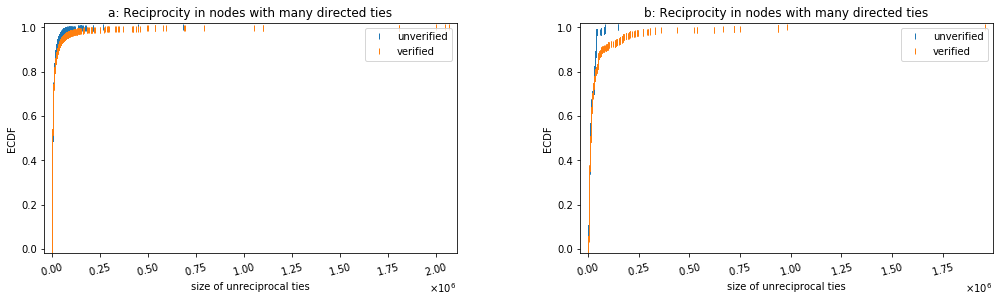

In [36]:
# reciprocity in ground-truth data:
plt.figure(figsize=(17,2))
plt.subplot(121)
ecdf(du_dyads3.Directed, du_dyads3.NetDirected, ecdf_marker = '|')#, percentile=0.85)#, x_label='Network')
ecdf(dv_dyads3.Directed, dv_dyads3.NetDirected, ecdf_marker='|')
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0),useMathText=True)

plt.xlabel('size of unreciprocal ties')
plt.legend(['unverified','verified'],loc='best')
plt.tick_params(axis='x', rotation=15)
plt.margins(0.02)
plt.title('a: Reciprocity in nodes with many directed ties')
############ Subplot 6: CDF of transitive ties ... 
plt.subplot(122)
ecdf(du_transitive3.Directed, du_transitive3.NetDirected, ecdf_marker = '|')
ecdf(dv_transitive3.Directed, dv_transitive3.NetDirected, ecdf_marker='|')
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0),useMathText=True)

plt.xlabel('size of unreciprocal ties')
plt.legend(['unverified','verified'],loc='best')
plt.tick_params(axis='x', rotation=15)
plt.margins(0.02)
plt.title('b: Reciprocity in nodes with many directed ties')

plt.subplots_adjust(top=1.7, bottom=0.10, left=0.125, right=0.9, hspace=0.3, wspace=0.3)
plt.show()

**The above two figures** show the relationship between number of directed ties and reciprocity across different users. The results emonstrate that verified users have many directed nodes or unreciprocated ties but with less reciprocity. This observation is true/holds for nodes with many dyadic and transitive ties in the datasetse. This also corresponds to what is to be observed ituitively because, as described earlier, verified users are gorup of users with certain social status such as celebrities or poiticians, hence posessing large followership.

*Other stats:*

    # box-plots of relevant stats in the data ... this output should be merged with the directed ties to form a unified figure ... 

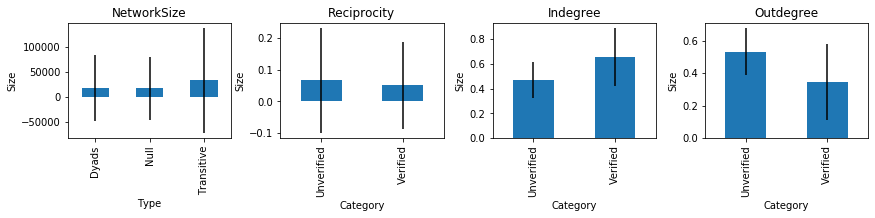

In [37]:
plt.figure(figsize=(13,1))
plt.subplot(141)
(df4.groupby('Type')['NetworkSize']
.mean().plot(kind='bar', title='NetworkSize',yerr=df4.groupby('Type')['NetworkSize'].std()).set_ylabel('Size'));
#... 
plt.subplot(142)
(df4.groupby('Category')['Reciprocity']
.mean().plot(kind='bar', title='Reciprocity',yerr=df4.groupby('Category')['Reciprocity'].std()).set_ylabel('Size'));
#... 
plt.subplot(143)
(df4.groupby('Category')['Indegree']
.mean().plot(kind='bar', title='Indegree',yerr=df4.groupby('Category')['Indegree'].std()).set_ylabel('Size'));
#.. 
plt.subplot(144)
(df4.groupby('Category')['Outdegree']
.mean().plot(kind='bar', title='Outdegree',yerr=df4.groupby('Category')['Outdegree'].std()).set_ylabel('Size'));
#config ...
plt.subplots_adjust(top=1.7, bottom=0.10, left=0.135, right=0.99, hspace=0.3, wspace=0.3)
plt.show()

**The boxplots** show some relevant stats about the groundtruth data. Reciprocity is relatively higher among unverified users despite the fact that verified users tend to have higher indegree (friend requests not reciprocated). Note that reciprocity is generally lower in the datasets, the mean is about $10\%$ and maximum is about $20\%$. Because many number of users have to searched to obtain set of transitive ties, the network size of data with transitive ties is higher than the collection involving dyadic and diected (null) ties.

In [38]:
#**Using Additional Dataset:** ... Some samples:

In [39]:
df2.head(3)

,NetworkSize,Dyads,Category,NetDyadsRatio
0,489,158,Unverified,0.323108
0,370,142,Unverified,0.383784
0,333,163,Unverified,0.489489


In [40]:
df3.head(3)

,FollowersCount,FriendsCount,Type,NetworkSize,Dyads,Directed,Indegree,Outdegree,Reciprocity,Category,NetDirected
0,21048,1848,Null,22896,11.0,21048,0.919287,0.080713,0.000480,Verified,0.919287
1,3498,871,Null,4369,103.0,3498,0.800641,0.199359,0.023575,Verified,0.800641
2,43932,4396,Null,48328,95.0,43932,0.909038,0.090962,0.001966,Verified,0.909038


In [41]:
df4.head(3)

,FollowersCount,FriendsCount,NetworkSize,Dyads,Directed,Indegree,Outdegree,Reciprocity,Category,Type
3,23366,733,24099,21.0,23366,0.969584,0.030416,0.000871,Verified,Null
5,1091,487,1578,24.0,1091,0.691381,0.308619,0.015209,Verified,Null
15,7785,1383,9168,166.0,7785,0.849149,0.150851,0.018106,Verified,Null


    # ...high-level observations 

In [5]:
#all data - structurally similar and dissimilar nodes ... 
df = pd.read_csv('data/mct_structurally_related_nodes03.csv')
#drop duplicates and unused columns:
dv1 = df[['Va_Name','Prob_Tie', 'NetSize', 'NetBand']]
dv = dv1.drop_duplicates(subset='Va_Name')
len(df),len(dv), len(dv1)

(664877, 9511, 664877)

In [6]:
# some samples:
dv.head(3)

,Va_Name,Prob_Tie,NetSize,NetBand
0,art_by_fatima,0.485004,436,9641
105,StrongCitizens,0.485004,496,9641
209,kathleendleslie,0.427759,713,9641


In [7]:
# create a default dictionary to store the relevant values
dval = defaultdict(list)
for net, tie in zip(dv1.NetBand,dv1.Prob_Tie):
    dval[net].append(tie)
# extract the mean values from each:
dmeans = {}
for k in dval.keys():
    dmeans[k]=np.mean(dval[k])
# extract relevant values for visualisation:
x = sorted([k for k in dmeans.keys()])
y = sorted([round(v,3) for v in dmeans.values()])

    # some visualisations ...

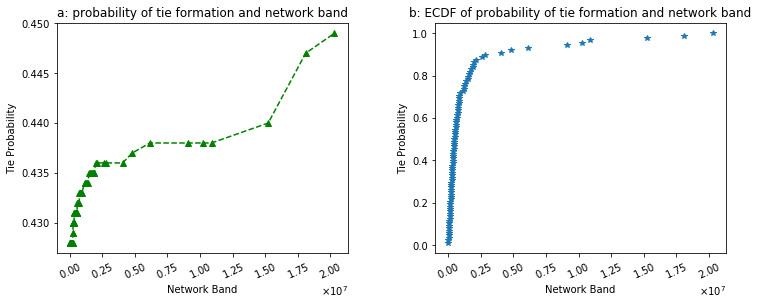

In [8]:
plt.figure(figsize=(12,2))

############ Subplot 1: Line plot of network band and edge formation probability based on social homophily. 
plt.subplot(121)
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0),useMathText=True)
plt.plot(x,y, 'g^--')
plt.xlabel('Network Band')
plt.ylabel('Tie Probability')
plt.tick_params(axis='x', rotation=25)
plt.title('a: probability of tie formation and network band')

############ Subplot 2: ECDF ... network band and edge formation probability 
plt.subplot(122)
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0),useMathText=True)

ecdf(x, y, ecdf_marker='*')
plt.xlabel('Network Band')
plt.ylabel('Tie Probability')
plt.tick_params(axis='x', rotation=25)
plt.title('b: ECDF of probability of tie formation and network band')

plt.subplots_adjust(top=1.7, bottom=0.10, left=0.125, right=0.9, hspace=0.3, wspace=0.3)
plt.savefig('results/line_and_ecdf_plots_of_ties04.png', dpi=330,bbox_inches='tight')
plt.show()

The above figures show the probability of tie formation as a function of network size/band. There is a high chance of reciprocating tie among participants/users in network band of $0.5\times 10^6$ and $0.5\times 10^7$. .... s similar visualisation is required for the structurally unrelated category ... and also *more results related to the structurally-related nodes:* using other network -- Facebook data and Enron data, and data from Stanford repository.

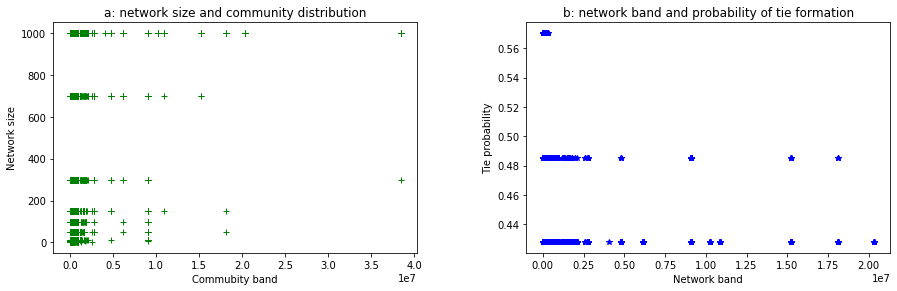

In [10]:
#observing where some of the distributions are ...
plt.figure(figsize=(15,2))
plt.subplot(121)
plt.plot(df.NetSize, df.CommBand, 'g+')
plt.xlabel('Commubity band')
plt.ylabel('Network size')
plt.title('a: network size and community distribution')

plt.subplot(122)
plt.plot(df.NetBand, df.Prob_Tie, 'b*')
plt.xlabel('Network band')
plt.ylabel('Tie probability')
plt.title('b: network band and probability of tie formation')

plt.subplots_adjust(top=1.7, bottom=0.10, left=0.125, right=0.9, hspace=0.3, wspace=0.3)
#plt.savefig('results/mct_network_size_and_community_distributions.png', dpi=350)
plt.show()

    # The above figures show distribution of community nodes (on the basis of structural property) according to network size vs comunity band and accoding to network band and probability of tie formation among nodes ...
**Sub-figure a** depicts how most nodes get clustered/many communiy of users are formed among users with network size of less than 500 (about 350; ranging from size of 1 to 350). We can observe a dense cluster of nodes within that region. The users in that community have similar network properties in terms of the number of *followings* and *followers* noting the difference in the community band. Recall that the community bands are discretised according to the difference/magnitude of the difference in th structural attributes described earlier in the text. Nodes with exact simialrity will be in community with 0 difference in the simialrity upto the maximum difference possible in the data.

Similarly, **sub-figure b** shows the the relationship between the network size of nodes and the probability of establishing a reciprcal tie. Nodes with relatively small network size are more likely/highly likely to reciprocate a tie/relationship/followership than nodes with a larger network size. Notice how the nodes get clustered accroding to the probabilities in which three differenct categries/groups can be observed according to the magnitude of probability of tie formation. In all these, the highly dense areas/regions happen within group of nodes with relatively small network size, about $0.3\times 10^7$.

In [11]:
### Textual data ... some empirical observations 

### 2.2 SNAP Datasets

    #a meta-analysis involving SNAP dataset ... 

In [42]:
#for meta-analysis:
fd = pd.read_csv('data/snapdata/fb_ego_and_circle_size.csv') # to examine ego-edges and number of circles ...
ufd = fd.drop_duplicates(subset='UserID')
len(fd), len(ufd);fd.head(3)

,UserID,Edge,Dyads,CircleSize
0,0,1,"(0, 1)",347
1,0,2,"(0, 2)",347
2,0,3,"(0, 3)",347


In [43]:
ufd.head(3)

,UserID,Edge,Dyads,CircleSize
0,0,1,"(0, 1)",347
347,1,48,"(1, 48)",16
363,2,20,"(2, 20)",9


In [44]:
duc = pd.read_csv('/data/snapdata/facebook/extracts/users_circles0.circles.csv')
len(duc);duc.head(3)

,UserID,Circles
0,71,circle0
1,215,circle0
2,54,circle0


In [46]:
duc.head(3)

,UserID,Circles
0,71,circle0
1,215,circle0
2,54,circle0


In [47]:
duc = pd.read_csv('/data/snapdata/facebook/extracts/users_circles0.circles.csv')
len(duc);duc.head(3)

,UserID,Circles
0,71,circle0
1,215,circle0
2,54,circle0


    # Ego-networks data .... some visualisations II

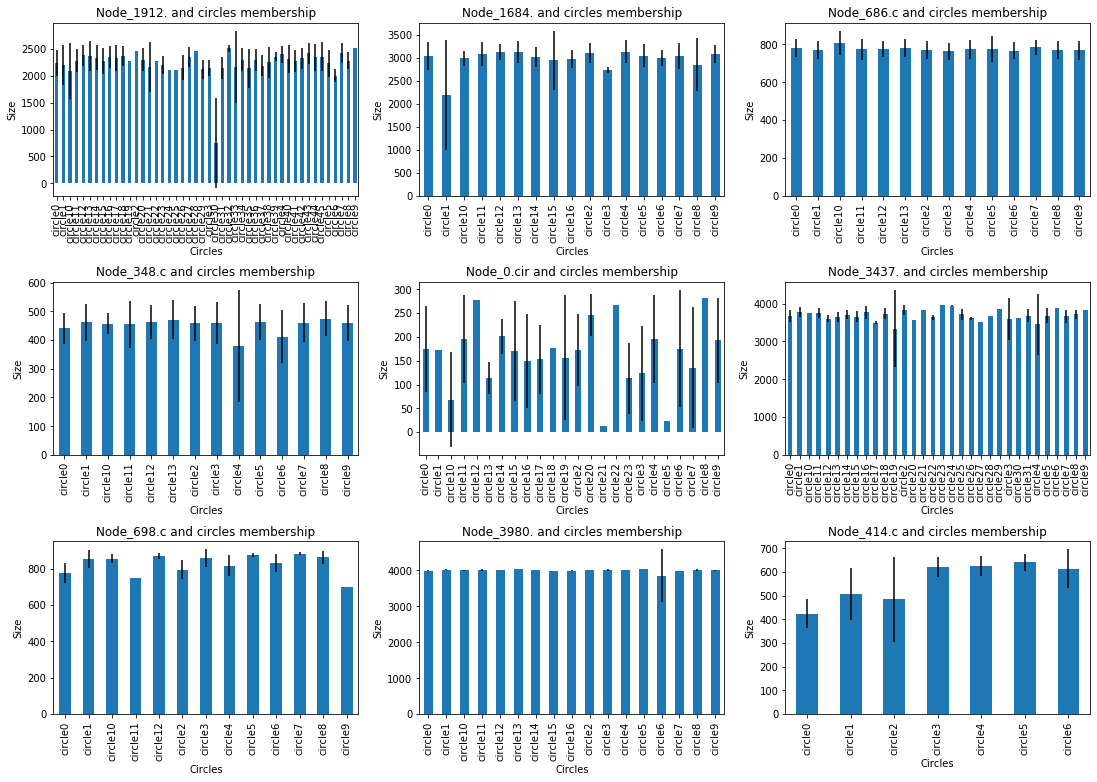

In [49]:
files = os.listdir('/data/snapdata/facebook/extracts')
data2plot = []
for file in files:
    if file.startswith('users_circles'):
        data2plot.append(file)

####### sub-plots: 
#plt.figure(figsize=(13,1))
for d, idx in zip(data2plot, range(1, len(data2plot))):
    if idx%2==0:
        df = pd.read_csv('/data/snapdata/facebook/extracts/'+d)
        plt.subplot(int('33'+str(idx)))
        (df.groupby('Circles')['UserID'].mean().plot(kind='bar', title='Node_'+d[13:18]+' and circles membership',\
                        yerr=df.groupby('Circles')['UserID'].std()).set_ylabel('Size'));
        plt.subplots_adjust(top=2.5, bottom=0.10, left=0.5, right=2.9, hspace=0.5, wspace=0.2)
    else:
        df = pd.read_csv('/data/snapdata/facebook/extracts/'+d)
        plt.subplot(int('33'+str(idx)))
        (df.groupby('Circles')['UserID'].mean().plot(kind='bar', title='Node_'+d[13:18]+' and circles membership',\
                        yerr=df.groupby('Circles')['UserID'].std()).set_ylabel('Size'));
        plt.subplots_adjust(top=2.5, bottom=0.10, left=0.5, right=2.9, hspace=0.5, wspace=0.2)

In [50]:
# plots for some nodes with unclear results ... e.g:
d0 = pd.read_csv('/data/snapdata/facebook/extracts/users_circles0.circles.csv')
d19 = pd.read_csv('/data/snapdata/facebook/extracts/users_circles1912.circles.csv')
d34 = pd.read_csv('/data/snapdata/facebook/extracts/users_circles3437.circles.csv')
len(d0), len(d19),len(d34)

(325, 1065, 192)

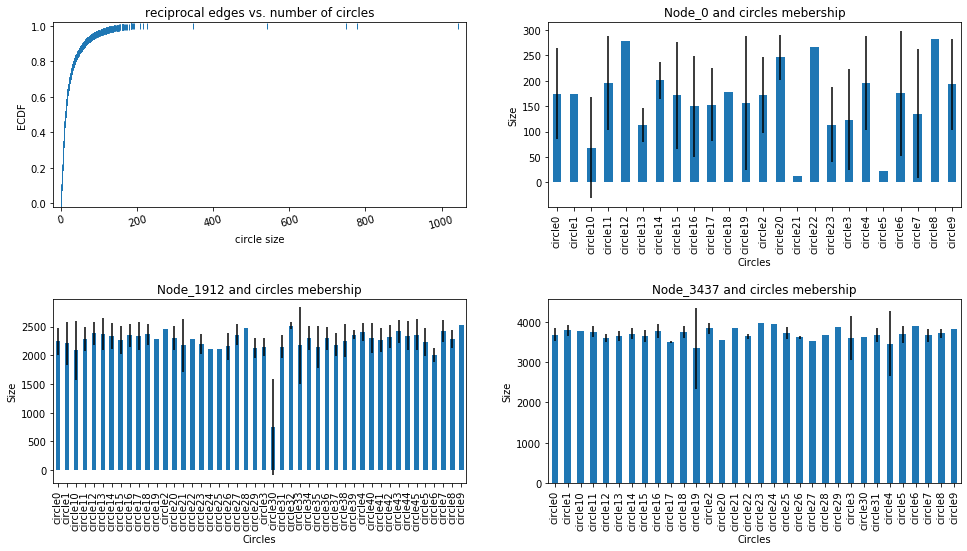

In [51]:
# the plots:
plt.figure(figsize=(14,2))
plt.subplot(221)
# some stats in SNAP datasets ... 
ecdf(ufd.CircleSize, ufd.Edge, ecdf_marker = '|')
plt.xlabel('circle size')
plt.tick_params(axis='x', rotation=15)
plt.margins(0.02)
plt.title('reciprocal edges vs. number of circles')

plt.subplot(222)
(d0.groupby('Circles')['UserID'].mean()
 .plot(kind='bar',title='Node_0 and circles mebership',yerr=d0.groupby('Circles')['UserID'].std()).set_ylabel('Size'));

plt.subplot(223)
(d19.groupby('Circles')['UserID'].mean()
 .plot(kind='bar',title='Node_1912 and circles mebership',yerr=d19.groupby('Circles')['UserID'].std()).set_ylabel('Size'));

plt.subplot(224)
(d34.groupby('Circles')['UserID'].mean()
 .plot(kind='bar',title='Node_3437 and circles mebership',yerr=d34.groupby('Circles')['UserID'].std()).set_ylabel('Size'));

plt.subplots_adjust(top=3.5, bottom=0.3, left=0.5, right=1.4, hspace=0.5, wspace=0.2)
plt.show()

In [ ]:
#########################################################################################################################